In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pylab as plt
import numpy as np

In [3]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D_in, H),
            nn.Sigmoid(),
            nn.Linear(H, D_out)
        )

    def forward(self, x):
        return self.net(x)

In [4]:
class NetTanh(nn.Module):
    def __init__(self, D_in, H, D_out):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D_in, H),
            nn.Tanh(),
            nn.Linear(H, D_out)
        )

    def forward(self, x):
        return self.net(x)

In [5]:
class NetRelu(nn.Module):
    def __init__(self, D_in, H, D_out):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Linear(H, D_out)
        )

    def forward(self, x):
        return self.net(x)

In [23]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

In [24]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [25]:
criterion = nn.CrossEntropyLoss()

In [26]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [27]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [28]:
# with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [29]:
# with tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [30]:
# with relu function

modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=30)

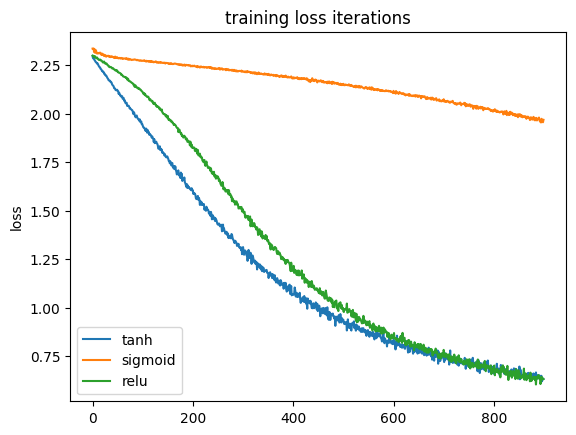

In [31]:
# training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

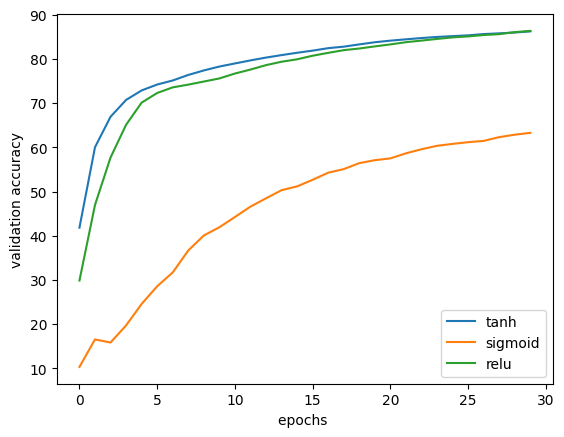

In [32]:
# vlaidation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()